In [1]:
!cp -r /content/drive/MyDrive/Lenguaje/Proyecto/Modules Modules
!pip install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
!pip install top2vec[sentence_transformers]

     |████████████████████████████████| 18.2 MB 443 kB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 837 kB 29.1 MB/s 
     |████████████████████████████████| 140 kB 53.2 MB/s 
     |████████████████████████████████| 830 kB 42.9 MB/s 
     |████████████████████████████████| 822 kB 47.5 MB/s 
     |████████████████████████████████| 802 kB 51.0 MB/s 
     |████████████████████████████████| 802 kB 56.1 MB/s 
     |████████████████████████████████| 793 kB 46.6 MB/s 
     |████████████████████████████████| 793 kB 52.2 MB/s 
     |████████████████████████████████| 791 kB 41.1 MB/s 
     |████████████████████████████████| 786 kB 50.5 MB/s 
     |████████████████████████████████| 779 kB 51.0 MB/s 
     |████████████████████████████████| 778 kB 52.5 MB/s 
     |████████████████████████████████| 776 kB 58.4 MB/s 
     |████████████████████████████████| 769 kB 50.8 MB/s 
     |████████████████████████████████| 766 kB 52.5 MB/s 
     |██████████

In [2]:
from Modules.functions import get_centroid_topics
from Modules.params import get_params
import matplotlib.pyplot as plt
from pandas import read_csv
from top2vec import Top2Vec
import matplotlib as mpl
from os.path import join

In [21]:
params=get_params()
filename=join(params["path models"],
              params["tripadvisor model"])
model = Top2Vec.load(filename)

In [36]:
filename = join(params["path results"],
                "tripadvisor_clustered.csv")
clustered = read_csv(filename)
centroids = get_centroid_topics(clustered,
                                model)

(0.902677165, 13.349862135, 1.5868543899999998, 13.00576541)

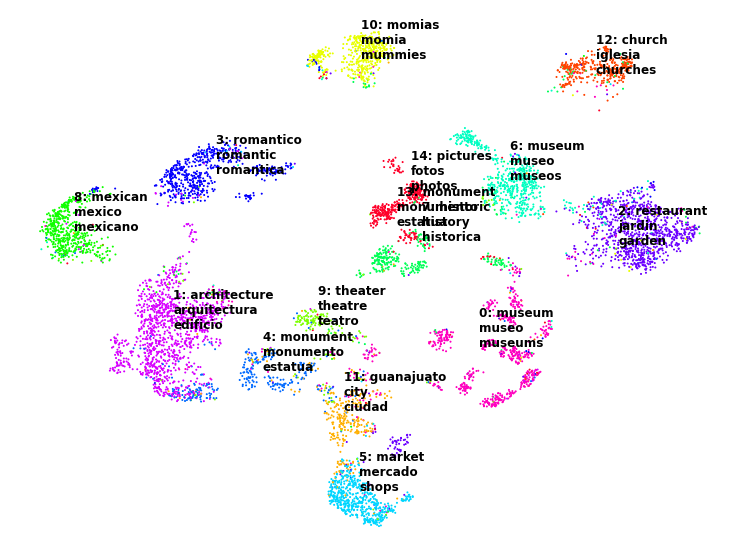

In [37]:
bounds = list(range(0, 15))
cmap = mpl.cm.gist_rainbow_r
norm = mpl.colors.BoundaryNorm(bounds,
                               cmap.N)
plt.subplots(figsize=(13, 10))
plt.scatter(clustered.x,
            clustered.y,
            c=clustered["topic"],
            cmap=cmap,
            norm=norm,
            s=1)
for index, data in centroids.items():
    topic_name = data["topic name"]
    centroid = data["centroid"]
    plt.text(centroid[0],
             centroid[1],
             topic_name,
             fontsize=12,
             weight='bold')
plt.axis("off")